In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indian-startup-funding:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1902%2F941761%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T184111Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87f94b4a1bf985c03c45d60b60ad13258719c66042b5634df27fbbd2820ee2c3f88c49ca3205329f7cb118d39703aeae07272a9799caa91f902f131a3088270d1ea8a9ae854e2459f8fd12548413726a6be557956d4b1d91c6c65354f5b29aecadad15db0951fd02af6ce5416bf5e08ebb6d8d1145de091c6760a8d774e562d35cf4a35e02d8b3168074fb16babe55598a21b1b3e5146b69fc79e2650092a1ef26bf726f556a9d91ed42dac9bd063db6d270b9fc29d9ea0c315b32db8d5e3270d3f5ec9624a934df94abc89b16bb7e7bdb233a29a56f60fb3f5980bae9352fc77207be98fa73a6bf1206646946a774b4bcd6a680df718f9b5f91e388281f2968'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 122812 bytes downloaded
Downloaded and uncompressed: indian-startup-funding
Data source import complete.


In [ ]:

# Enclosing scope ->Nested scope.
def outer(): # Enclosing , Non local scope.
  a = 3 # second
  def inner(): #local variable (most inner function)
    a = 4 # first
    print("inner function",a)
  inner()
  print('outer function')

a = 1 #third
outer()
print('main program')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [ ]:
df = pd.read_csv("/kaggle/input/indian-startup-funding/startup_funding.csv")
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [ ]:
sorted(df["Startup Name"].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [ ]:
df["Investors Name"] = df["Investors Name"].fillna("Undisclosed")

In [ ]:
sorted(df["Investors Name"].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


#Data Preprocessing

In [ ]:
# 1st
df.drop(columns = "Remarks",inplace = True)

In [ ]:
# 2nd
df.set_index("Sr No",inplace = True)

In [ ]:
# 3rd
df.rename(columns={
    "Date dd/mm/yyyy": "date",
    "Startup Name": "startup",
    "Industry Vertical":"vertical",
    "SubVertical" : "subVertical",
    "City  Location": "city",
    "Investors Name": "investors",
    "InvestmentnType" : "round",
    "Amount in USD" :"amount"
},inplace = True)

In [ ]:
df.head()

,date,startup,vertical,subVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [ ]:
#4th
df["amount"]=df["amount"].fillna("0")

In [ ]:
df["amount"]=df["amount"].str.replace(",",'')
df["amount"]=df["amount"].str.replace("undisclosed",'0')
df["amount"]=df["amount"].str.replace("Undisclosed",'0')
df["amount"]=df["amount"].str.replace("unknown",'0')

In [ ]:
df = df[df["amount"].str.isdigit()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3029 non-null   object
 1   startup      3029 non-null   object
 2   vertical     2858 non-null   object
 3   subVertical  2104 non-null   object
 4   city         2849 non-null   object
 5   investors    3029 non-null   object
 6   round        3027 non-null   object
 7   amount       3029 non-null   object
dtypes: object(8)
memory usage: 213.0+ KB


In [ ]:
df["amount"] = df["amount"].astype("float")

<ipython-input-42-7ff61eb84f48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount"] = df["amount"].astype("float")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subVertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3029 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [ ]:
df.head()

,date,startup,vertical,subVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [ ]:
def toinr(dollar):
  inr = dollar * 82.5
  return inr/10000000

df["amount"] = df["amount"].apply(toinr)


In [ ]:
df["amount"] = df["amount"].apply(lambda x : round(x,2))


In [ ]:
df.head()

,date,startup,vertical,subVertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.40
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.46
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.75
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.85


In [ ]:
#5 Convert data datatype to datetime from string
df["date"] = df["date"].str.replace("05/072018","05/07/2018")

In [ ]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y",errors = "coerce")

In [ ]:
df.head()

,date,startup,vertical,subVertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.40
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.46
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.75
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.85


In [ ]:
df.date.dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3023 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subVertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [ ]:
#6 drop the null values
df = df.dropna(subset = ["date","startup","vertical","city","investors","round","amount"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2843 non-null   datetime64[ns]
 1   startup      2843 non-null   object        
 2   vertical     2843 non-null   object        
 3   subVertical  2096 non-null   object        
 4   city         2843 non-null   object        
 5   investors    2843 non-null   object        
 6   round        2843 non-null   object        
 7   amount       2843 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 199.9+ KB


In [ ]:
lst = sorted(set(df["investors"].str.split(",").sum()))
del lst[0:2]
lst

[' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investors',
 ' Accel Partne

In [ ]:
df.to_csv("startup_clean.csv",index = False)

#Data Analysis

In [ ]:
df[df["investors"].str.contains("Mumbai Angels Network")]
df[df["investors"].str.contains("Sequoia Capital")].head()[["date","startup","vertical","city","round","amount"]]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
3,2020-01-09,Mamaearth,E-commerce,Bengaluru,Series B,151.46
69,2019-07-11,Moglix,E-Commerce,Singapore,Series D,495.00
93,2019-05-01,BlackBuck,Transport,Bengaluru,Series D,1237.50
114,2019-02-08,Zilingo,Ecommerce,India/Singapore,Series D,1864.50
150,2018-10-12,Blackbuck,Logistics Tech,Bengaluru,Private Funding,121.11


In [ ]:
df[df["investors"].str.contains("IDG Ventures")].groupby("startup")["amount"].sum().sort_values(ascending = False).head(1)

,amount
startup,
Cure Fit,990.0


<Axes: ylabel='amount'>

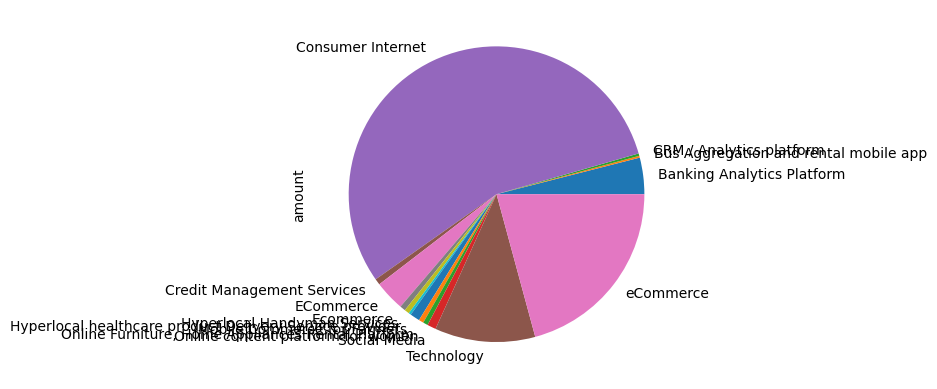

In [ ]:
df[df["investors"].str.contains("IDG Ventures")].groupby("vertical")["amount"].sum().plot(kind = "pie")

<Axes: ylabel='amount'>

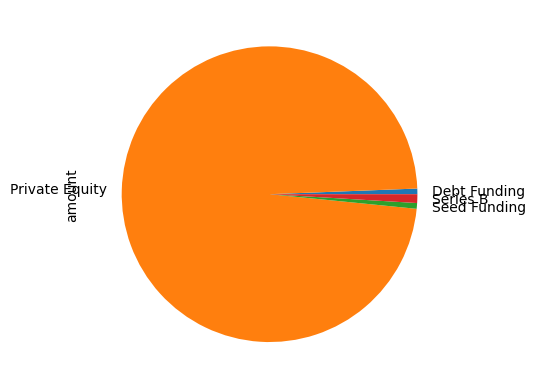

In [ ]:
df[df["investors"].str.contains("IDG Ventures")].groupby("round")["amount"].sum().plot(kind = "pie")

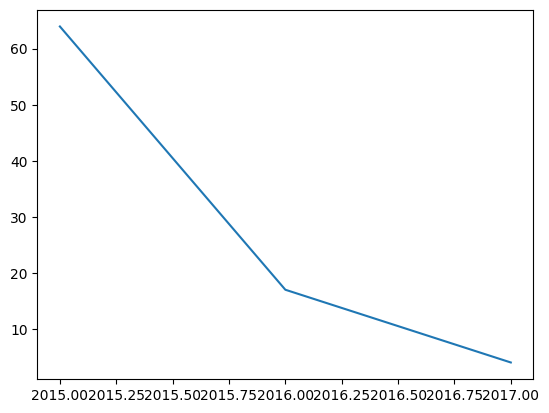

Index([2015, 2016, 2017], dtype='int32', name='year')

In [ ]:
import matplotlib.pyplot as plt
df["year"]  = df.date.dt.year
y = df[df["investors"].str.contains("Anupam Mittal")].groupby("year")["amount"].sum()

fig, ax = plt.subplots()
ax.plot(y.index, y.values)
plt.show()
y.index

In [ ]:
y.values

array([ 4950.  ,  2079.  , 18397.5 ,  4636.5 ,  1905.75])

In [ ]:
pd.read_csv("/content/startup_clean.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2843 non-null   object 
 1   startup      2843 non-null   object 
 2   vertical     2843 non-null   object 
 3   subVertical  2096 non-null   object 
 4   city         2843 non-null   object 
 5   investors    2843 non-null   object 
 6   round        2843 non-null   object 
 7   amount       2843 non-null   float64
dtypes: float64(1), object(7)
memory usage: 177.8+ KB


In [ ]:
df.head()

,date,startup,vertical,subVertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.40,2020
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.46,2020
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.75,2020
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.85,2020


In [ ]:
df["investors"].str.split(",").values

array([list(['Tiger Global Management']),
       list(['Susquehanna Growth Equity']),
       list(['Sequoia Capital India']), ..., list(['Rainmatter']),
       list(['The HR Fund']),
       list(['Bessemer Venture Partners', ' SAIF Partners'])],
      dtype=object)

In [ ]:
df["amount"].sum()

301619.56

In [ ]:
df.groupby("startup")["amount"].max().sort_values(ascending = False).head(2).values[0]

32175.0

In [ ]:
df["month"] = df["date"].dt.month

In [ ]:
df.groupby(["year","month"],as_index = False)["startup"].count()

,year,month,startup
0,2015,4,62
1,2015,5,55
2,2015,6,85
3,2015,7,85
4,2015,8,98
5,2015,9,88
6,2015,10,93
7,2015,11,92
8,2015,12,89
9,2016,1,104


In [ ]:
temp_df = df.groupby(["year","month"],as_index = False)["amount"].sum()
temp_df["x_axis"] = temp_df["month"].astype("str") + "-"  + (temp_df["year"]%100).astype('str')

In [ ]:
temp_df[["amount",'x_axis']]

,amount,x_axis
0,8089.13,4-15
1,2641.12,5-15
2,4306.41,6-15
3,12450.86,7-15
4,8776.43,8-15
5,12131.80,9-15
6,2103.43,10-15
7,7419.01,11-15
8,2523.25,12-15
9,5774.00,1-16


In [ ]:
df.groupby("vertical")["amount"].sum().sort_values(ascending = False).head(10)

,amount
vertical,
Consumer Internet,51587.24
eCommerce,41270.91
Transportation,32312.22
Technology,18395.00
Finance,16264.36
ECommerce,15500.06
FinTech,10070.87
E-Commerce,8276.56
Online Marketplace,5776.18


In [ ]:
df.groupby("round")["amount"].sum().sort_values(ascending = False).reset_index()

,round,amount
0,Private Equity,209596.50
1,Series B,39468.72
2,Series D,12224.84
3,Series C,8618.93
4,Funding Round,8250.00
5,Seed Funding,4466.76
6,Private Equity Round,4174.50
7,Series G,1905.75
8,Series A,1676.41
9,Seed Round,1615.34


In [ ]:
# df.replace({
#     "Bangalore" : "Bengaluru"
# },inplace = True)
df.groupby("city")["amount"].sum().sort_values(ascending = False).reset_index().set_index("city")

,amount
city,
Bengaluru,152171.55
Mumbai,40573.91
New Delhi,24896.86
Gurgaon,24753.29
Noida,10418.61
...,...
Kozhikode,0.00
London,0.00
New Delhi / California,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 1 to 2873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2843 non-null   datetime64[ns]
 1   startup      2843 non-null   object        
 2   vertical     2843 non-null   object        
 3   subVertical  2096 non-null   object        
 4   city         2843 non-null   object        
 5   investors    2843 non-null   object        
 6   round        2843 non-null   object        
 7   amount       2843 non-null   float64       
 8   year         2843 non-null   int32         
 9   month        2843 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 222.1+ KB


In [ ]:
df.replace({
    "Flipkart.com": "Flipkart"
},inplace = True)
new = df.groupby(["year","startup"],as_index = False)["amount"].sum().sort_values(["year","amount"],ascending = [True,False]).drop_duplicates("year",keep = "first")
new["year"] = new["year"].astype("str")
new = new.set_index("year")

In [ ]:
data = df.groupby("startup",as_index = False)["amount"].sum().sort_values("amount",ascending = False)[["startup","amount"]]

In [ ]:
data.rename(columns = {"startup" : "Overall startup", "amount" : "Overall amount"},inplace = True)

In [ ]:
df.groupby("investors")["amount"].sum().sort_values(ascending = False)

,amount
investors,
Westbridge Capital,32175.00
Softbank,20625.00
SoftBank Group,12061.50
"Microsoft, eBay, Tencent Holdings",11550.00
Vijay Shekhar Sharma,8251.24
...,...
India Quotient & other investors,0.00
Samir Shah,0.00
India Educational Investment Fund,0.00


In [ ]:
df.groupby("startup",)["amount"].sum()

,amount
startup,
"""BYJU\\'S""",1237.50
121Policy,0.00
19th mile,1.49
1Crowd,0.00
1mg,330.00
...,...
underDOGS,0.00
vImmune,0.00
vPhrase Analytics,0.00


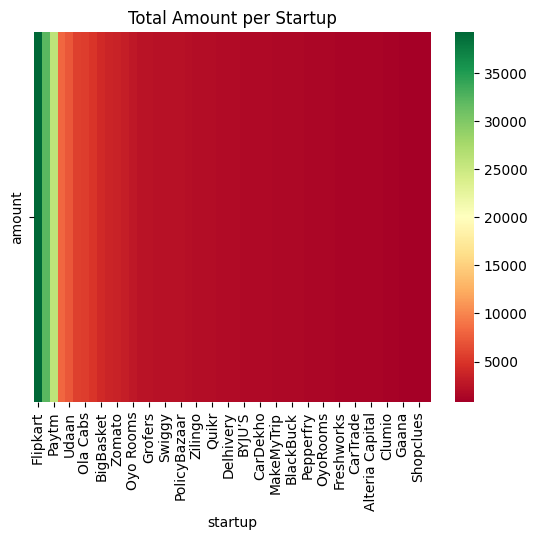

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data and calculate the sum
grouped_data = df.groupby("startup",)["amount"].sum().sort_values(ascending = False).head(50)

# Create a heatmap
sns.heatmap(grouped_data.to_frame().T, cmap="RdYlGn")
plt.title("Total Amount per Startup")
plt.show()

In [ ]:
df["startup"].replace({'"BYJU\\\\\'S"': "Byju's"}, inplace=True)

In [ ]:
df[df["startup"] == "Shuttl"]["vertical"]

,vertical
Sr No,
2,Transportation
111,Transportation
222,Consumer Internet
2120,App based Bus Pooling Services


In [ ]:
df[df["startup"]== "Byju's"][["startup","investors","date"]].set_index("startup")

,investors,date
startup,,
Byju's,Qatar Investment Authority,2019-07-10


In [ ]:
df.replace({"https://www.wealthbucket.in/" : "WealthBucket"},inplace = True)

In [ ]:
 industry = df[df["startup"] == "Byju's"]["vertical"].values[0]
 industry

'EdTech'

In [ ]:
s = df[df["startup"] == "1mg"]
v = s["subVertical"].unique()
v_list = list(v)
filtered_df = df[df["subVertical"].isin(v_list)]


,date,startup,vertical,subVertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
312,2018-04-27,1mg,Consumer Internet,Online Pharmacy Store,Gurugram,"Sequoia Capital, Maverick Capital Ltd and HBM ...",Private Equity,82.50,2018,4
316,2018-03-01,PharmEasy,Consumer Internet,Online Pharmacy Store,Mumbai,Bessemer Venture Partners and Orios Venture Pa...,Private Equity,0.00,2018,3
573,2017-10-31,NetMeds,ECommerce,Online Pharmacy,Chennai,TannCam Investment & Sistema Asia Fund,Private Equity,115.50,2017,10
717,2017-07-27,1mg,eCommerce,Online Pharmacy,Gurgaon,"HBM Healthcare Investments, Maverick Capital V...",Private Equity,123.75,2017,7
758,2017-06-16,HealthIntel,Healthcare,Online Pharmacy,New Delhi,BLIP Initiatives,Seed Funding,0.00,2017,6
852,2017-05-31,SastaSundar,eCommerce,Online Pharmacy,Kolkata,Rohto Pharmaceutical,Private Equity,41.25,2017,5
874,2017-04-07,PharmEasy,eCommerce,Online Pharmacy,Mumbai,"Bessemer Venture Partners, Orios Venture Partn...",Private Equity,148.50,2017,4
913,2017-04-26,Myra,Consumer Internet,Online Pharmacy,Bengaluru,"Times Internet,Matrix Partners",Private Equity,0.00,2017,4
1223,2016-11-18,AerMed,eCommerce,Online Pharmacy,Mumbai,Hitesh Windlass,Seed Funding,0.00,2016,11


In [ ]:
s = df[df["startup"] == "1mg"]
v = s["subVertical"].unique()
v_list = list(v)
filtered_df = df[df["subVertical"].isin(v_list)]

In [ ]:
df[df["subVertical"] == "Online Pharmacy Store"]

,date,startup,vertical,subVertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
312,2018-04-27,1mg,Consumer Internet,Online Pharmacy Store,Gurugram,"Sequoia Capital, Maverick Capital Ltd and HBM ...",Private Equity,82.5,2018,4
316,2018-03-01,PharmEasy,Consumer Internet,Online Pharmacy Store,Mumbai,Bessemer Venture Partners and Orios Venture Pa...,Private Equity,0.0,2018,3


In [ ]:
investor = df[df["investors"].str.contains("Sequoia Capital")]

# Check for overlapping verticals between investor and df DataFrames
matching_verticals = np.intersect1d((investor["vertical"]),(df["vertical"].unique()))
v = list(matching_verticals)
# Filter based on matching verticals
filtered_df = df[df["vertical"].isin(v)]





,date,startup,vertical,subVertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.46,2020,1
8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,49.50,2019,12
9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,577.50,2019,12
11,2019-12-13,Rivigo,Technology,Logistics Services and Solutions,Gurgaon,"SAIF Partners, Spring Canter Investment Ltd.",Series F,165.00,2019,12
13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,247.50,2019,12
...,...,...,...,...,...,...,...,...,...,...
2825,2015-04-09,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bengaluru,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,412.50,2015,4
2836,2015-04-15,Grofers,Hyper-Local Online/Mobile Grocery,NaN,Gurgaon,"Tiger Global, Sequoia Capital",Private Equity,288.75,2015,4
2837,2015-04-15,PepperTap,Hyper-Local Online/Mobile Grocery,NaN,Gurgaon,"SAIF Partners, Sequoia Capital",Private Equity,82.50,2015,4


In [ ]:

    investor = df[df["investors"].str.contains("Softbank")]
    investor
    # Check for overlapping verticals between investor and df DataFrames
    matching_verticals = np.intersect1d((investor["vertical"]),(df["vertical"].unique()))
    v = list(matching_verticals)
    v
    # # Filter based on matching verticals
    filtered_df = df[df["vertical"].isin(v)][["startup","vertical",'investors']].set_index("vertical")

,date,startup,vertical,subVertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,577.50,2019,12
13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,247.50,2019,12
17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,1905.75,2019,12
18,2019-11-13,Freshworks,Software,Business and customer engagement tools,San Francisco,"Sequoia, CapitalG, Accel",Series H,1237.50,2019,11
28,2019-11-19,Digital Mall Asia,E-Commerce,Virtual e-commerce platform,Delhi,Amour Infrastructure,Seed Funding,1815.00,2019,11
...,...,...,...,...,...,...,...,...,...,...
2416,2015-09-14,Ola Cabs,Cab rental Mobile app,NaN,Bengaluru,"Falcon Edge Capital, NY based Hedge Fund, Tige...",Private Equity,1856.25,2015,9
2471,2015-08-01,Snapdeal,Ecommerce Marketplace,NaN,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,4125.00,2015,8
2574,2015-07-01,Ola Cabs,Cab rental Mobile app,NaN,Bengaluru,Ratan Tata,Private Equity,0.00,2015,7
